In [1]:
import os
work_dir = './'
import pycisTopic
#set some figure parameters for nice display inside jupyternotebooks.
%matplotlib inline

#make a directory for to store the processed scRNA-seq data.
if not os.path.exists(os.path.join(work_dir, 'scATAC')):
    os.makedirs(os.path.join(work_dir, 'scATAC'))
tmp_dir = '/pollard/data/projects/zhhu/tmp/'

In [2]:
import pickle
cistopic_obj = pickle.load(open(os.path.join(work_dir, 'scATAC/cistopic_obj.pkl'), 'rb'))

import pandas as pd
celltype = pd.read_csv("/pollard/data/projects/zhhu/cellwalk/pbmc/pbmc10k_meta_signac.csv",index_col=0)

In [3]:
import numpy as np
cellnames = pd.Series([i + '-10x_pbmc' for i in celltype.index ])
ind = np.where([x in cistopic_obj.cell_names for x in cellnames])[0]
cellnames = cellnames[ind]

In [4]:
cistopic_obj2 = cistopic_obj.subset(cellnames, copy=True, split_pattern='-')
cistopic_obj2.add_LDA_model(cistopic_obj.selected_model)  # change the cell_topic of cistopic_obj too

In [9]:
cistopic_obj2.cell_data['celltype'] = celltype.loc[cistopic_obj2.cell_data.barcode, 'predicted.id'].values
cistopic_obj2.cell_data

,Log_unique_nr_frag,cisTopic_log_nr_frag,Unique_nr_frag_in_regions,cisTopic_nr_acc,cisTopic_log_nr_acc,Unique_nr_frag,cisTopic_nr_frag,Dupl_rate,Dupl_nr_frag,barcode,...,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,ingest_celltype_label,leiden_res_0.8,celltype,sample_id
AAACAGCCAATCCCTT-1-10x_pbmc,4.127753,4.004149,9620,8529,3.930898,13420,10096,0.546238,16155,AAACAGCCAATCCCTT-1,...,0.059794,False,1895,3770.0,397.0,10.530504,CD4 T cells,3,CD4 TCM,10x_pbmc
AAACAGCCAATGCGCT-1-10x_pbmc,4.050573,3.918764,7910,7426,3.870755,11235,8294,0.490846,10831,AAACAGCCAATGCGCT-1,...,0.080255,False,2903,6875.0,444.0,6.458182,CD4 T cells,6,CD4 Naive,10x_pbmc
AAACAGCCACCAACCG-1-10x_pbmc,3.710287,3.575996,3608,3499,3.543944,5132,3767,0.516943,5492,AAACAGCCACCAACCG-1,...,0.041497,False,2281,5413.0,352.0,6.502864,CD4 T cells,6,CD8 Naive,10x_pbmc
AAACAGCCAGGATAAC-1-10x_pbmc,3.818490,3.699231,4764,4557,3.658679,6584,5003,0.513593,6952,AAACAGCCAGGATAAC-1,...,0.101449,False,1353,2759.0,191.0,6.922798,CD4 T cells,0,CD4 Naive,10x_pbmc
AAACAGCCAGTAGGTG-1-10x_pbmc,4.415941,4.285805,18480,14901,4.173215,26058,19311,0.571957,34819,AAACAGCCAGTAGGTG-1,...,0.059794,False,3061,7614.0,525.0,6.895193,CD4 T cells,0,CD8 Naive,10x_pbmc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGACATGC-1-10x_pbmc,4.006936,3.87944,7208,6506,3.813314,10161,7576,0.521092,11056,TTTGTTGGTGACATGC-1,...,0.023874,False,1585,3284.0,358.0,10.901340,CD4 T cells,0,CD8 Naive,10x_pbmc
TTTGTTGGTGTTAAAC-1-10x_pbmc,4.058957,3.947189,8410,7723,3.887786,11454,8855,0.489822,10997,TTTGTTGGTGTTAAAC-1,...,0.029570,False,1524,2865.0,317.0,11.064572,CD4 T cells,0,CD8 Naive,10x_pbmc
TTTGTTGGTTAGGATT-1-10x_pbmc,3.825491,3.716754,4969,4702,3.672283,6691,5209,0.497106,6614,TTTGTTGGTTAGGATT-1,...,0.017414,False,2023,4147.0,412.0,9.934893,NK cells,10,NK,10x_pbmc
TTTGTTGGTTGGTTAG-1-10x_pbmc,4.078167,3.931915,8117,7459,3.872681,11972,8549,0.513630,12643,TTTGTTGGTTGGTTAG-1,...,0.035821,False,1618,2974.0,159.0,5.346335,CD4 T cells,3,CD4 TEM,10x_pbmc


In [ ]:
a = cistopic_obj2.cell_data.groupby(['ingest_celltype_label', 'celltype']).size()
a[a>10]

2024-02-12 18:30:56,507 cisTopic     INFO     Running UMAP


/pollard/home/zhhu/miniconda3/envs/scenicplus/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


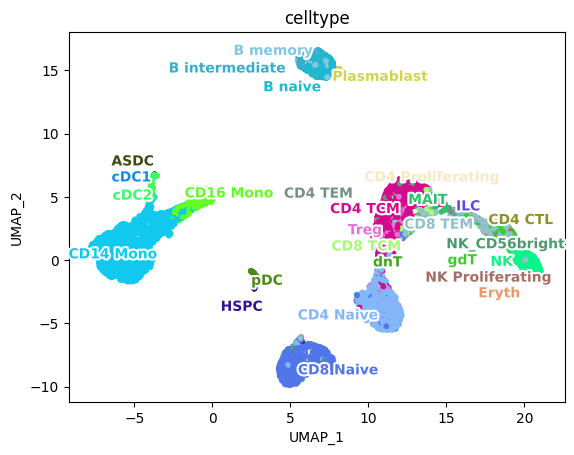

In [23]:
from pycisTopic.clust_vis import *
run_umap(cistopic_obj2, target  = 'cell', scale=True)
plot_metadata(cistopic_obj2, reduction_name = 'UMAP', variables = ['celltype'])

In [24]:
from pycisTopic.diff_features import *
imputed_acc_obj = impute_accessibility(cistopic_obj2, selected_cells=None, selected_regions=None, scale_factor=10**6)
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
variable_regions = find_highly_variable_features(normalized_imputed_acc_obj, plot = False)
markers_dict = find_diff_features(cistopic_obj2, imputed_acc_obj, variable='celltype', var_features=variable_regions, split_pattern = '-')

2024-02-12 18:32:07,159 cisTopic     INFO     Imputing region accessibility
2024-02-12 18:32:07,160 cisTopic     INFO     Impute region accessibility for regions 0-20000
2024-02-12 18:32:07,824 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2024-02-12 18:32:08,490 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2024-02-12 18:32:09,150 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2024-02-12 18:32:09,805 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2024-02-12 18:32:10,473 cisTopic     INFO     Impute region accessibility for regions 100000-120000
2024-02-12 18:32:11,128 cisTopic     INFO     Impute region accessibility for regions 120000-140000
2024-02-12 18:32:11,785 cisTopic     INFO     Impute region accessibility for regions 140000-160000
2024-02-12 18:32:12,439 cisTopic     INFO     Impute region accessibility for regions 160000-180000
2024-02-12 18:32:13,102 cisTopic     

<Figure size 640x480 with 0 Axes>

In [25]:
# if not os.path.exists(os.path.join(work_dir, 'scATAC/candidate_enhancers')):
#     os.makedirs(os.path.join(work_dir, 'scATAC/candidate_enhancers'))
# import pickle
# pickle.dump(region_bin_topics_otsu, open(os.path.join(work_dir, 'scATAC/candidate_enhancers/region_bin_topics_otsu.pkl'), 'wb'))
#pickle.dump(region_bin_topics_top3k, open(os.path.join(work_dir, 'scATAC/candidate_enhancers/region_bin_topics_top3k.pkl'), 'wb'))
pickle.dump(markers_dict, open(os.path.join(work_dir, 'scATAC/candidate_enhancers/markers2_dict.pkl'), 'wb'))
pickle.dump(cistopic_obj2,
            open(os.path.join(work_dir, 'scATAC/cistopic_obj2.pkl'), 'wb'))

In [26]:
import pickle
region_bin_topics_otsu = pickle.load(open(os.path.join(work_dir, 'scATAC/candidate_enhancers/region_bin_topics_otsu.pkl'), 'rb'))
region_bin_topics_top3k = pickle.load(open(os.path.join(work_dir, 'scATAC/candidate_enhancers/region_bin_topics_top3k.pkl'), 'rb'))
markers_dict = pickle.load(open(os.path.join(work_dir, 'scATAC/candidate_enhancers/markers2_dict.pkl'), 'rb'))

In [27]:
import pyranges as pr
from pycistarget.utils import region_names_to_coordinates
region_sets = {}
region_sets['topics_otsu'] = {}
region_sets['topics_top_3'] = {}
region_sets['DARs'] = {}
for topic in region_bin_topics_otsu.keys():
    regions = region_bin_topics_otsu[topic].index[region_bin_topics_otsu[topic].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets['topics_otsu'][topic] = pr.PyRanges(region_names_to_coordinates(regions))
for topic in region_bin_topics_top3k.keys():
    regions = region_bin_topics_top3k[topic].index[region_bin_topics_top3k[topic].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets['topics_top_3'][topic] = pr.PyRanges(region_names_to_coordinates(regions))

In [28]:
for DAR in markers_dict.keys():
    print(DAR)
    regions = markers_dict[DAR].index[markers_dict[DAR].index.str.startswith('chr')] #only keep regions on known chromosomes
    if len(regions) > 0:
      region_sets['DARs'][DAR] = pr.PyRanges(region_names_to_coordinates(regions))

ASDC
B intermediate
B memory
B naive
CD14 Mono
CD16 Mono
CD4 CTL
CD4 Naive
CD4 Proliferating
CD4 TCM
CD4 TEM
CD8 Naive
CD8 TCM
CD8 TEM
Eryth
HSPC
ILC
MAIT
NK
NK Proliferating
NK_CD56bright
Plasmablast
Treg
cDC1
cDC2
dnT
gdT
pDC


In [29]:
for key in region_sets.keys():
    print(f'{key}: {region_sets[key].keys()}')

topics_otsu: dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16'])
topics_top_3: dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16'])
DARs: dict_keys(['ASDC', 'B intermediate', 'B memory', 'B naive', 'CD14 Mono', 'CD16 Mono', 'CD4 CTL', 'CD4 Naive', 'CD4 TCM', 'CD4 TEM', 'CD8 Naive', 'CD8 TCM', 'CD8 TEM', 'HSPC', 'MAIT', 'NK', 'NK Proliferating', 'NK_CD56bright', 'Plasmablast', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC'])


In [30]:
db_fpath = "./"
motif_annot_fpath = "./"
rankings_db = os.path.join(db_fpath, 'hg38_screen_v10_clust.regions_vs_motifs.rankings.feather')
scores_db =  os.path.join(db_fpath, 'hg38_screen_v10_clust.regions_vs_motifs.scores.feather')
motif_annotation = os.path.join(motif_annot_fpath, 'motifs-v10nr_clust-nr.hgnc-m0.001-o0.0.tbl')

In [31]:
if not os.path.exists(os.path.join(work_dir, 'motifs2')):
    os.makedirs(os.path.join(work_dir, 'motifs2'))

In [ ]:
from scenicplus.wrappers.run_pycistarget import run_pycistarget
run_pycistarget(
    region_sets = region_sets,
    species = 'homo_sapiens',
    save_path = os.path.join(work_dir, 'motifs2'),
    ctx_db_path = rankings_db,
    dem_db_path = scores_db,
    path_to_motif_annotations = motif_annotation,
    run_without_promoters = True,
    n_cpu = 32,
    #_temp_dir = os.path.join(tmp_dir, 'ray_spill'),
    annotation_version = 'v10nr_clust',
    )

In [1]:
import dill
import scanpy as sc
import os
import warnings
warnings.filterwarnings("ignore")
import pandas
import pyranges
# Set stderr to null to avoid strange messages from ray
import sys
_stderr = sys.stderr
null = open(os.devnull,'wb')
work_dir = './'

#adata = sc.read_h5ad(os.path.join(work_dir, 'scRNA/adata.h5ad'))
#cistopic_obj = dill.load(open(os.path.join(work_dir, 'scATAC/cistopic_obj2.pkl'), 'rb'))
#menr = dill.load(open(os.path.join(work_dir, 'motifs2/menr.pkl'), 'rb'))

In [2]:
scplus_obj = dill.load(open(os.path.join(work_dir, 'scenicplus/scplus_obj2.pkl'), 'rb'))

In [37]:
adata.raw.to_adata()

AnnData object with n_obs × n_vars = 10734 × 26346
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ingest_celltype_label', 'leiden_res_0.8', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'celltype_colors', 'hvg', 'ingest_celltype_label_colors', 'leiden', 'leiden_res_0.8_colors', 'log1p', 'neighbors', 'pca', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap', 'rep'
    obsp: 'connectivities', 'distances'

In [6]:
from scenicplus.scenicplus_class import create_SCENICPLUS_object
import numpy as np
scplus_obj = create_SCENICPLUS_object(
    GEX_anndata = adata.raw.to_adata(),
    cisTopic_obj = cistopic_obj,
    menr = menr,
    bc_transform_func = lambda x: f'{x}-10x_pbmc' #function to convert scATAC-seq barcodes to scRNA-seq ones
)
scplus_obj.X_EXP = np.array(scplus_obj.X_EXP.todense())
scplus_obj

2024-02-13 12:04:53,836 cisTopic     INFO     Imputing region accessibility
2024-02-13 12:04:53,837 cisTopic     INFO     Impute region accessibility for regions 0-20000
2024-02-13 12:04:55,714 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2024-02-13 12:04:57,594 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2024-02-13 12:04:59,489 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2024-02-13 12:05:01,377 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2024-02-13 12:05:03,293 cisTopic     INFO     Impute region accessibility for regions 100000-120000
2024-02-13 12:05:05,199 cisTopic     INFO     Impute region accessibility for regions 120000-140000
2024-02-13 12:05:07,077 cisTopic     INFO     Impute region accessibility for regions 140000-160000
2024-02-13 12:05:08,965 cisTopic     INFO     Impute region accessibility for regions 160000-180000
2024-02-13 12:05:10,844 cisTopic     

SCENIC+ object with n_cells x n_genes = 9797 x 26346 and n_cells x n_regions = 9797 x 317880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'GEX_n_genes', 'GEX_doublet_score', 'GEX_predicted_doublet', 'GEX_n_genes_by_counts', 'GEX_total_counts', 'GEX_total_counts_mt', 'GEX_pct_counts_mt', 'GEX_ingest_celltype_label', 'GEX_leiden_res_0.8', 'GEX_celltype', 'ACC_Log_unique_nr_frag', 'ACC_cisTopic_log_nr_frag', 'ACC_Unique_nr_frag_in_regions', 'ACC_cisTopic_nr_acc', 'ACC_cisTopic_log_nr_acc', 'ACC_Unique_nr_frag', 'ACC_cisTopic_nr_frag', 'ACC_Dupl_rate', 'ACC_Dupl_nr_frag', 'ACC_barcode', 'ACC_TSS_enrichment', 'ACC_Total_nr_frag', 'ACC_FRIP', 'ACC_Total_nr_frag_in_regions', 'ACC_Log_total_nr_frag', 'ACC_n_genes', 'ACC_doublet_score', 'A

In [8]:
scplus_obj.dr_cell['GEX_X_pca'] = scplus_obj.dr_cell['GEX_X_pca'].iloc[:, 0:2]
scplus_obj.dr_cell['GEX_rep'] = scplus_obj.dr_cell['GEX_rep'].iloc[:, 0:2]

In [6]:
scplus_obj.metadata_cell

,GEX_n_genes,GEX_doublet_score,GEX_predicted_doublet,GEX_n_genes_by_counts,GEX_total_counts,GEX_total_counts_mt,GEX_pct_counts_mt,GEX_ingest_celltype_label,GEX_leiden_res_0.8,GEX_celltype,...,ACC_doublet_score,ACC_predicted_doublet,ACC_n_genes_by_counts,ACC_total_counts,ACC_total_counts_mt,ACC_pct_counts_mt,ACC_ingest_celltype_label,ACC_leiden_res_0.8,ACC_celltype,ACC_sample_id
GCGATTAGTAGTAAGA-1-10x_pbmc,1540,0.003234,False,1540,3177.0,237.0,7.459868,B cells,5,B_cells_1,...,0.003234,False,1540,3177.0,237.0,7.459868,B cells,5,B naive,10x_pbmc
CTGGCTAAGGCTTAGT-1-10x_pbmc,1403,0.031013,False,1403,2539.0,197.0,7.758960,CD8 T cells,9,CD8_T_cells,...,0.031013,False,1403,2539.0,197.0,7.758960,CD8 T cells,9,CD8 TEM,10x_pbmc
CTATGACAGCTTCCCG-1-10x_pbmc,2663,0.023874,False,2663,6120.0,795.0,12.990196,CD14+ Monocytes,2,CD14+_Monocytes,...,0.023874,False,2663,6120.0,795.0,12.990196,CD14+ Monocytes,2,CD14 Mono,10x_pbmc
GCCAATTAGGTAAGGC-1-10x_pbmc,1342,0.011410,False,1342,2407.0,168.0,6.979643,CD14+ Monocytes,1,CD14+_Monocytes,...,0.011410,False,1342,2407.0,168.0,6.979643,CD14+ Monocytes,1,CD14 Mono,10x_pbmc
AGGTCATTCTAACCAA-1-10x_pbmc,2057,0.028875,False,2057,4240.0,495.0,11.674528,CD14+ Monocytes,1,CD14+_Monocytes,...,0.028875,False,2057,4240.0,495.0,11.674528,CD14+ Monocytes,1,CD14 Mono,10x_pbmc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGTATGTTCGTTAACA-1-10x_pbmc,1506,0.036701,False,1505,2756.0,222.0,8.055153,CD4 T cells,6,CD4_T_cells,...,0.036701,False,1505,2756.0,222.0,8.055153,CD4 T cells,6,CD4 Naive,10x_pbmc
TACAGGTTCTGTTGCC-1-10x_pbmc,1569,0.047074,False,1569,3116.0,311.0,9.980745,CD4 T cells,3,CD4_T_cells,...,0.047074,False,1569,3116.0,311.0,9.980745,CD4 T cells,3,CD4 TCM,10x_pbmc
CTAGGACGTCAGGAAG-1-10x_pbmc,3818,0.082844,False,3818,10656.0,1440.0,13.513513,FCGR3A+ Monocytes,8,FCGR3A+_Monocytes,...,0.082844,False,3818,10656.0,1440.0,13.513513,FCGR3A+ Monocytes,8,CD16 Mono,10x_pbmc
CTATGAGGTCAAGTAT-1-10x_pbmc,1981,0.031013,False,1981,4172.0,687.0,16.466923,CD14+ Monocytes,1,CD14+_Monocytes,...,0.031013,False,1981,4172.0,687.0,16.466923,CD14+ Monocytes,1,CD14 Mono,10x_pbmc


In [3]:
biomart_host = "http://sep2019.archive.ensembl.org/"

In [28]:
filter_celltypes = scplus_obj.metadata_cell.ACC_celltype.value_counts()
filter_celltypes = filter_celltypes[filter_celltypes >= 15]
filter_celltypes.index.to_list()

['CD14 Mono',
 'CD4 TCM',
 'CD8 Naive',
 'CD4 Naive',
 'CD8 TEM',
 'CD16 Mono',
 'NK',
 'B naive',
 'B intermediate',
 'CD4 TEM',
 'Treg',
 'cDC2',
 'gdT',
 'B memory',
 'MAIT',
 'pDC',
 'CD8 TCM',
 'CD4 CTL',
 'HSPC',
 'Plasmablast']

In [ ]:
cells = [] 
for x in scplus_obj.cell_names:
    y = scplus_obj.metadata_cell.loc[x, 'ACC_celltype']
    if y in filter_celltypes.index.to_list():
        cells.append(x)


scplus_obj.subset(cells)

In [59]:
scplus_obj.uns['eRegulon_AUC']['Region_based'] = scplus_obj.uns['eRegulon_AUC']['Region_based'].loc[cells, :]
scplus_obj.uns['eRegulon_AUC']['Gene_based'] = scplus_obj.uns['eRegulon_AUC']['Gene_based'].loc[cells, :]

In [ ]:
scplus_obj.dr_cell['eRegulons_UMAP'] = []
scplus_obj.dr_cell['eRegulons_tSNE'] = []

scplus_obj.dr_cell.keys()

In [70]:
from scenicplus.wrappers.run_scenicplus import run_scenicplus
try:
    run_scenicplus(
        scplus_obj = scplus_obj,
        variable = ['ACC_celltype'],
        species = 'hsapiens',
        assembly = 'hg38',
        tf_file = 'pbmc_tutorial/data/utoronto_human_tfs_v_1.01.txt',
        save_path = os.path.join(work_dir, 'scenicplus2'),
        biomart_host = biomart_host,
        upstream = [1000, 150000],
        downstream = [1000, 150000],
        calculate_TF_eGRN_correlation = True,
        calculate_DEGs_DARs = True,
        export_to_loom_file = False,
        export_to_UCSC_file = True,
        path_bedToBigBed = 'pbmc_tutorial',
        n_cpu = 12,
        _temp_dir = '/pollard/data/projects/zhhu/tmp/',
        _system_config={
             "local_fs_capacity_threshold" : 0.99
         }
    ) #os.path.join(tmp_dir, 'ray_spill'))
except Exception as e:
    #in case of failure, still save the object
    dill.dump(scplus_obj, open(os.path.join(work_dir, 'scenicplus/scplus_obj2.pkl'), 'wb'), protocol=-1)
    raise(e)

2024-02-13 23:44:19,612 SCENIC+_wrapper INFO     ./scenicplus2 folder already exists.
2024-02-13 23:44:19,613 SCENIC+_wrapper INFO     Calculating TF-eGRNs AUC correlation
2024-02-13 23:44:53,909 SCENIC+_wrapper INFO     Calculating eRSS
2024-02-13 23:45:18,242 SCENIC+_wrapper INFO     Calculating DEGs/DARs
2024-02-13 23:45:18,243 SCENIC+      INFO     Calculating DEGs for variable ACC_celltype
2024-02-13 23:45:22,483 SCENIC+      INFO     There are 4428 variable features


... storing 'ACC_celltype' as categorical
... storing 'ACC_sample_id' as categorical


2024-02-13 23:45:27,643 SCENIC+      INFO     Finished calculating DEGs for variable ACC_celltype
2024-02-13 23:45:27,644 SCENIC+      INFO     Calculating DARs for variable ACC_celltype
2024-02-13 23:46:52,080 SCENIC+      INFO     There are 61066 variable features


... storing 'ACC_celltype' as categorical
... storing 'ACC_sample_id' as categorical


2024-02-13 23:48:25,333 SCENIC+      INFO     Finished calculating DARs for variable ACC_celltype
2024-02-13 23:48:25,334 SCENIC+_wrapper INFO     Exporting to UCSC
2024-02-13 23:48:26,285 R2G          INFO     Downloading gene annotation from biomart, using dataset: hsapiens_gene_ensembl
2024-02-13 23:48:26,728 R2G          INFO     Formatting data ...
2024-02-13 23:48:49,497 R2G          INFO     Writing data to: ./scenicplus2/r2g.rho.bed
2024-02-13 23:48:50,907 R2G          INFO     Writing data to: ./scenicplus2/r2g.rho.bb
2024-02-13 23:48:54,210 R2G          INFO     Downloading gene annotation from biomart, using dataset: hsapiens_gene_ensembl
2024-02-13 23:48:54,575 R2G          INFO     Formatting data ...
2024-02-13 23:49:18,376 R2G          INFO     Writing data to: ./scenicplus2/r2g.importance.bed
2024-02-13 23:49:19,746 R2G          INFO     Writing data to: ./scenicplus2/r2g.importance.bb
2024-02-13 23:49:23,502 SCENIC+_wrapper INFO     Saving object
2024-02-14 00:12:47,86

In [71]:
scplus_obj.to_df('EXP')

,AL627309.1,AL627309.5,AL627309.4,AL669831.2,LINC01409,FAM87B,LINC01128,LINC00115,FAM41C,AL645608.6,...,BX004987.1,AC145212.1,MAFIP,AC011043.1,AL354822.1,AL592183.1,AC240274.1,AC004556.3,AC007325.1,AC007325.4
TTCAGTTTCACAGGAA-1-10x_pbmc,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
AATCTTGAGTCACCAG-1-10x_pbmc,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
ACAACACTCTACCTAT-1-10x_pbmc,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.944523,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
ACAAAGGTCCTCCATA-1-10x_pbmc,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
GTACTAATCACGTTAA-1-10x_pbmc,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCCAATAGTGATGAAA-1-10x_pbmc,0.0,0.000000,0.0,0.0,0.0,0.0,1.30729,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
TAATCCGCAGCAACCT-1-10x_pbmc,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
AAGTGTTGTCACAAAT-1-10x_pbmc,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.538797,0.0,0.0,0.0,0.0
ACAGGAATCCCGTTTA-1-10x_pbmc,0.0,1.153924,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [72]:
scplus_obj.menr.keys()  # motif enrichment

dict_keys(['CTX_topics_otsu_All', 'CTX_topics_otsu_No_promoters', 'DEM_topics_otsu_All', 'DEM_topics_otsu_No_promoters', 'CTX_topics_top_3_All', 'CTX_topics_top_3_No_promoters', 'DEM_topics_top_3_All', 'DEM_topics_top_3_No_promoters', 'CTX_DARs_All', 'CTX_DARs_No_promoters', 'DEM_DARs_All', 'DEM_DARs_No_promoters'])

In [73]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 9755 x 26346 and n_cells x n_regions = 9755 x 317880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'GEX_n_genes', 'GEX_doublet_score', 'GEX_predicted_doublet', 'GEX_n_genes_by_counts', 'GEX_total_counts', 'GEX_total_counts_mt', 'GEX_pct_counts_mt', 'GEX_ingest_celltype_label', 'GEX_leiden_res_0.8', 'GEX_celltype', 'ACC_Log_unique_nr_frag', 'ACC_cisTopic_log_nr_frag', 'ACC_Unique_nr_frag_in_regions', 'ACC_cisTopic_nr_acc', 'ACC_cisTopic_log_nr_acc', 'ACC_Unique_nr_frag', 'ACC_cisTopic_nr_frag', 'ACC_Dupl_rate', 'ACC_Dupl_nr_frag', 'ACC_barcode', 'ACC_TSS_enrichment', 'ACC_Total_nr_frag', 'ACC_FRIP', 'ACC_Total_nr_frag_in_regions', 'ACC_Log_total_nr_frag', 'ACC_n_genes', 'ACC_doublet_score', 'A

In [15]:
scplus_obj.uns['eRegulons'][0:5]

[eRegulon for TF AHR in context frozenset({'Top 10 region-to-gene links per gene', 'Cistromes_Unfiltered', '0.85 quantile', 'positive tf2g', 'BASC binarized', 'positive r2g'}).
 	This eRegulon has 24 target regions and 23 target genes.,
 eRegulon for TF ARID5B in context frozenset({'Top 15 region-to-gene links per gene', 'Top 5 region-to-gene links per gene', 'Top 10 region-to-gene links per gene', 'Cistromes_Unfiltered', 'positive tf2g', '0.95 quantile', 'positive r2g'}).
 	This eRegulon has 32 target regions and 23 target genes.,
 eRegulon for TF ATF3 in context frozenset({'Top 15 region-to-gene links per gene', '0.95 quantile', 'Top 5 region-to-gene links per gene', 'Top 10 region-to-gene links per gene', 'Cistromes_Unfiltered', '0.9 quantile', '0.85 quantile', 'positive tf2g', 'BASC binarized', 'positive r2g'}).
 	This eRegulon has 2114 target regions and 842 target genes.,
 eRegulon for TF BACH1 in context frozenset({'Top 15 region-to-gene links per gene', '0.95 quantile', 'Top 5 

In [74]:
for attr in dir(scplus_obj.uns['eRegulons'][0]):
    if not attr.startswith('_'):
        print(f"{attr}: {getattr(scplus_obj.uns['eRegulons'][0], attr) if not type(getattr(scplus_obj.uns['eRegulons'][0], attr)) == list else getattr(scplus_obj.uns['eRegulons'][0], attr)[0:5]}")

cistrome_name: AHR_(3826r)
context: frozenset({'Top 10 region-to-gene links per gene', 'Cistromes_Unfiltered', '0.85 quantile', 'positive tf2g', 'BASC binarized', 'positive r2g'})
gsea_adj_pval: None
gsea_enrichment_score: None
gsea_pval: None
in_leading_edge: None
is_extended: False
n_target_genes: 23
n_target_regions: 24
regions2genes: [r2g(region='chr1:7771148-7771648', target='CAMTA1', importance=0.04268516644760365, rho=0.07332876981053303, importance_x_rho=0.003130050744760616, importance_x_abs_rho=0.003130050744760616), r2g(region='chr14:75281142-75281642', target='FOS', importance=0.006809374773559877, rho=0.4120513100961571, importance_x_rho=0.00280581179638107, importance_x_abs_rho=0.00280581179638107), r2g(region='chr4:39638743-39639243', target='UBE2K', importance=0.08812245643286436, rho=0.10724032023419092, importance_x_rho=0.009450280447683911, importance_x_abs_rho=0.009450280447683911), r2g(region='chr5:140557223-140557723', target='ANKHD1', importance=0.010588498962679

In [75]:
scplus_obj.uns['eRegulon_metadata'].head()

,Region_signature_name,Gene_signature_name,TF,is_extended,Region,Gene,R2G_importance,R2G_rho,R2G_importance_x_rho,R2G_importance_x_abs_rho,TF2G_importance,TF2G_regulation,TF2G_rho,TF2G_importance_x_abs_rho,TF2G_importance_x_rho
0,AHR_+_+_(24r),AHR_+_+_(23g),AHR,False,chr1:7771148-7771648,CAMTA1,0.042685,0.073329,0.003130,0.003130,2.061621,1,0.071408,0.147216,0.147216
1,AHR_+_+_(24r),AHR_+_+_(23g),AHR,False,chr14:75281142-75281642,FOS,0.006809,0.412051,0.002806,0.002806,3.354381,1,0.398949,1.338226,1.338226
2,AHR_+_+_(24r),AHR_+_+_(23g),AHR,False,chr14:75283065-75283565,FOS,0.032546,0.673500,0.021920,0.021920,3.354381,1,0.398949,1.338226,1.338226
3,AHR_+_+_(24r),AHR_+_+_(23g),AHR,False,chr4:39638743-39639243,UBE2K,0.088122,0.107240,0.009450,0.009450,1.055958,1,0.082354,0.086962,0.086962
4,AHR_+_+_(24r),AHR_+_+_(23g),AHR,False,chr5:140557223-140557723,ANKHD1,0.010588,0.057200,0.000606,0.000606,1.846553,1,0.084277,0.155621,0.155621


In [4]:
import warnings
import os
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
_stderr = sys.stderr
null = open(os.devnull,'wb')

In [54]:
import dill
work_dir = './'
scplus_obj = dill.load(open(os.path.join(work_dir, 'scenicplus2/scplus_obj.pkl'), 'rb'))

In [76]:
from scenicplus.preprocessing.filtering import apply_std_filtering_to_eRegulons
apply_std_filtering_to_eRegulons(scplus_obj)

Only keeping positive R2G
Only keep extended if not direct
Getting signatures...
Simplifying eRegulons ...


In [ ]:
scplus_obj.uns['eRegulon_metadata_filtered'].head()


In [40]:
from scenicplus.eregulon_enrichment import score_eRegulons
region_ranking = dill.load(open(os.path.join(work_dir, 'scenicplus2/region_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
gene_ranking = dill.load(open(os.path.join(work_dir, 'scenicplus2/gene_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
score_eRegulons(scplus_obj,
                ranking = region_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type= 'region',
                auc_threshold = 0.05,
                normalize = False,
                n_cpu = 5)
score_eRegulons(scplus_obj,
                gene_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type = 'gene',
                auc_threshold = 0.05,
                normalize= False,
                n_cpu = 5)

In [44]:
scplus_obj.cell_names

Index(['TTCAGTTTCACAGGAA-1-10x_pbmc', 'AATCTTGAGTCACCAG-1-10x_pbmc',
       'ACAACACTCTACCTAT-1-10x_pbmc', 'ACAAAGGTCCTCCATA-1-10x_pbmc',
       'GTACTAATCACGTTAA-1-10x_pbmc', 'ATGTGAGAGGCGAATA-1-10x_pbmc',
       'AATAGAGGTTAACGAT-1-10x_pbmc', 'TGCTATGCACGCAACT-1-10x_pbmc',
       'GCTGGTTCATGGCCTG-1-10x_pbmc', 'CAGGATGCATCCTGAA-1-10x_pbmc',
       ...
       'CGAAGTAAGGTATTGC-1-10x_pbmc', 'ACTCGCTTCCAAACAC-1-10x_pbmc',
       'GTTCACCTCTAACCTT-1-10x_pbmc', 'GTTTCTAGTCAAAGGG-1-10x_pbmc',
       'CTAATGTCATTATGGT-1-10x_pbmc', 'GCCAATAGTGATGAAA-1-10x_pbmc',
       'TAATCCGCAGCAACCT-1-10x_pbmc', 'AAGTGTTGTCACAAAT-1-10x_pbmc',
       'ACAGGAATCCCGTTTA-1-10x_pbmc', 'GAGCTGCTCGTTACAA-1-10x_pbmc'],
      dtype='object', length=9755)

In [45]:
scplus_obj.uns['eRegulon_AUC_filtered']['Region_based'] = scplus_obj.uns['eRegulon_AUC_filtered']['Region_based'].loc[scplus_obj.cell_names, :]
scplus_obj.uns['eRegulon_AUC_filtered']['Gene_based'] = scplus_obj.uns['eRegulon_AUC_filtered']['Gene_based'].loc[scplus_obj.cell_names, :]

In [46]:
from scenicplus.cistromes import TF_cistrome_correlation, generate_pseudobulks

generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'ACC_celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Gene_based')
generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'ACC_celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Region_based')

TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = True,
            variable = 'ACC_celltype',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Gene_based',
            out_key = 'filtered_gene_based')
TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = True,
            variable = 'ACC_celltype',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Region_based',
            out_key = 'filtered_region_based')

In [98]:
scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based'].head()

,TF,Cistrome,Rho,P-value,Adjusted_p-value
0,AHR,AHR_+_(24r),0.702713,1.040808e-297,3.075114e-297
1,SPIB,SPIB_-_(479r),-0.705900,1.415124e-301,4.278282e-301
2,ETS2,ETS2_-_(50r),-0.578131,9.693154e-179,1.575138e-178
3,KLF7,KLF7_+_(52r),0.562394,3.467170e-167,5.121955e-167
4,IKZF3,IKZF3_extended_-_(807r),-0.619454,2.787048e-212,5.939610e-212


/tmp/ipykernel_163861/4079117452.py:13: RuntimeWarning: divide by zero encountered in log10


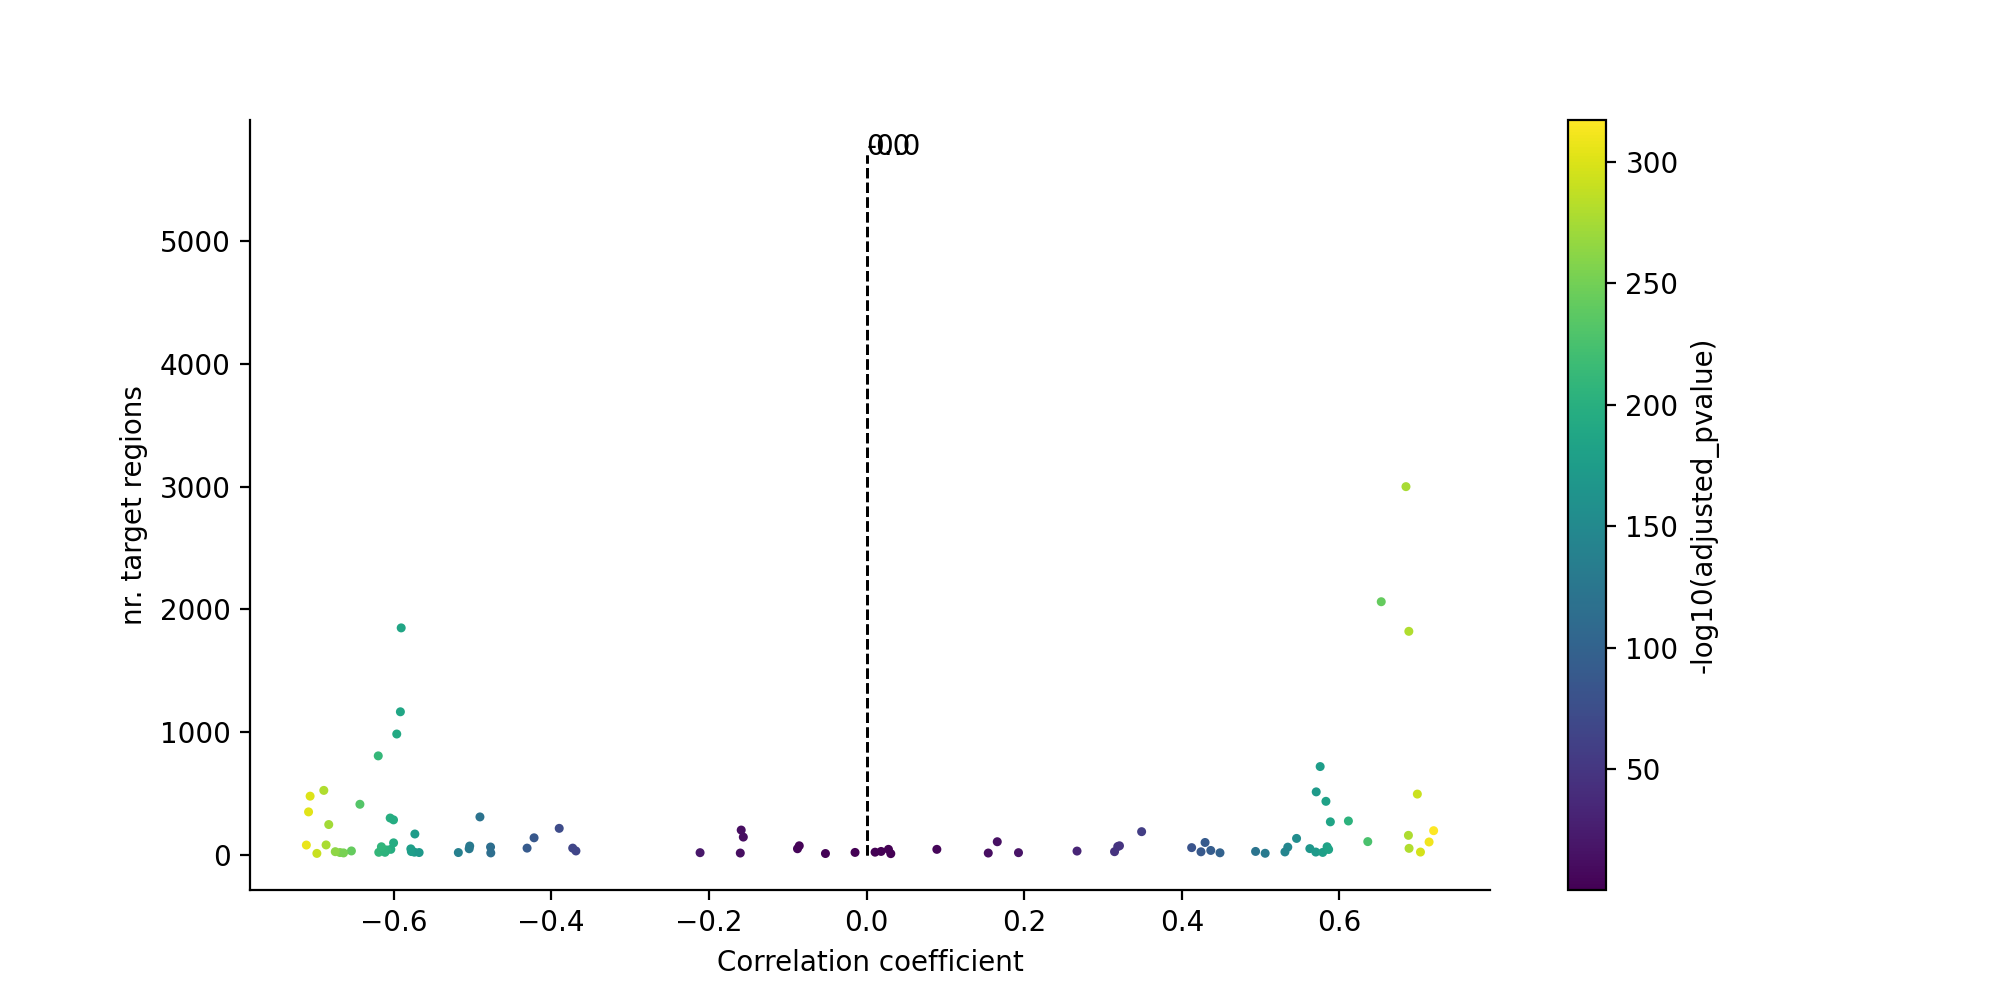

In [56]:
import numpy as np
n_targets = [int(x.split('(')[1].replace('r)', '')) for x in scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Cistrome']]
rho = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'].to_list()
adj_pval = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Adjusted_p-value'].to_list()

thresholds = {
        'rho': [-0.0, 0.0], #[-0.75, 0.70],
        'n_targets': 0
}
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 5))
sc = ax.scatter(rho, n_targets, c = -np.log10(adj_pval), s = 5)
ax.set_xlabel('Correlation coefficient')
ax.set_ylabel('nr. target regions')
#ax.hlines(y = thresholds['n_targets'], xmin = min(rho), xmax = max(rho), color = 'black', ls = 'dashed', lw = 1)
ax.vlines(x = thresholds['rho'], ymin = 0, ymax = max(n_targets), color = 'black', ls = 'dashed', lw = 1)
ax.text(x = thresholds['rho'][0], y = max(n_targets), s = str(thresholds['rho'][0]))
ax.text(x = thresholds['rho'][1], y = max(n_targets), s = str(thresholds['rho'][1]))
sns.despine(ax = ax)
fig.colorbar(sc, label = '-log10(adjusted_pvalue)', ax = ax)
plt.show()

In [61]:
selected_cistromes = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based'].loc[
        np.logical_or(
                scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] > thresholds['rho'][1],
                scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] < thresholds['rho'][0]
        )]['Cistrome'].to_list()
selected_eRegulons = [x.split('_(')[0] for x in selected_cistromes]
selected_eRegulons_gene_sig = [
        x for x in scplus_obj.uns['eRegulon_signatures_filtered']['Gene_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
selected_eRegulons_region_sig = [
        x for x in scplus_obj.uns['eRegulon_signatures_filtered']['Region_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
#save the results in the scenicplus object
scplus_obj.uns['selected_eRegulon'] = {'Gene_based': selected_eRegulons_gene_sig, 'Region_based': selected_eRegulons_region_sig}
print(f'selected: {len(selected_eRegulons_gene_sig)} eRegulons')

selected: 130 eRegulons


In [100]:
dill.dump(scplus_obj, open(os.path.join(work_dir, 'scenicplus2/scplus_obj.pkl'), 'wb'), protocol=-1)

In [1]:
import dill
import os
work_dir = './'
scplus_obj = dill.load(open(os.path.join(work_dir, 'scenicplus2/scplus_obj.pkl'), 'rb'))

In [49]:
scplus_obj.uns['eRegulon_AUC_filtered']['Region_based'].columns

Index(['AHR_+_(24r)', 'SPIB_-_(479r)', 'ETS2_-_(50r)', 'KLF7_+_(52r)',
       'IKZF3_extended_-_(807r)', 'KLF13_+_(19r)', 'SP4_-_(16r)',
       'MEF2A_-_(13r)', 'FOXO1_-_(310r)', 'E2F3_extended_+_(24r)',
       ...
       'TCF4_-_(217r)', 'ETS1_+_(3278r)', 'E2F1_+_(75r)', 'RORA_+_(58r)',
       'CREB1_+_(25r)', 'GATA2_+_(46r)', 'MAFB_extended_+_(530r)',
       'ZBTB16_-_(19r)', 'MAF_+_(198r)', 'LEF1_-_(1166r)'],
      dtype='object', length=130)

In [62]:
from scenicplus.plotting.dotplot import heatmap_dotplot
aa = heatmap_dotplot(
        scplus_obj = scplus_obj,
        size_matrix = scplus_obj.uns['eRegulon_AUC_filtered']['Region_based'], #specify what to plot as dot sizes, target region enrichment in this case
        color_matrix = scplus_obj.to_df('EXP'), #specify  what to plot as colors, TF expression in this case
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'ACC_celltype',
        subset_eRegulons = scplus_obj.uns['selected_eRegulon']['Gene_based'],
        index_order = ['NK', 'CD8 TEM', 'gdT', 'MAIT', 'Treg', 'CD4 TCM', 'CD4 TEM', 'CD8 TCM', 'CD4 Naive', 'CD8 Naive', 'CD16 Mono', 'CD14 Mono', 'cDC2', 'pDC', 'B naive', 'B intermediate', 'B memory'],
        figsize = (5, 20),
        orientation = 'vertical')

In [63]:
aa.data.TF.value_counts()

AHR       160
BCL11A    160
TCF4      160
RXRA      160
MEF2C     160
         ... 
NFE2L2     20
TFEB       20
KLF6       20
FOXO3      20
MAF        20
Name: TF, Length: 92, dtype: int64

In [64]:
aa.data.to_csv(os.path.join(work_dir, 'scenicplus2/scenicplus_tf_result_all.csv'))